# Reading File

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt 


In [2]:
def extract(filename):
    y = ""
    file = open(filename, 'r')
    l = []
    for ch in file:
        a = ch.split(" ")
        l.append(a)
    
    content = []
    output=""
    
    for i in l:
        for j in i:
            output=output+j.strip(' \t\n\r')+" "
    output=output.strip(' \t\n\r')+"$0"
    return output


In [3]:
output=extract('dataset.txt')


# Input search keyword or sentence

In [4]:
search_key=input("Enter value you want to search :")

Enter value you want to search :him


# Tree Creation

In [4]:
class Node(object):

    def __init__(self,substring,suffixnum):
        self.children = {} 
        self.suffixnum = suffixnum 
        self.substring = substring 

    def get_children(self,subs):
        parent = subs
        keys = list(self.children.keys())
        if(keys != []):
            for key in keys:
                if(key.startswith(parent)):
                    return self.children[key]
        else:
            return None

    def set_children(self,substring,child):
        self.children[substring] = child
    
    
        

In [5]:
def char_match_count(a,b):
    length = len(a)
    suffix_length = len(b)
    count = 0
    mlength=np.minimum(length,suffix_length)
    if(a[0]==b[0]):
        for i in range(0, mlength):
            if (a[i] == b[i]):
                count += 1
            else:
                break

    return count

In [6]:
class SuffixTree(object):
    
    def __init__(self):
        self.root = Node(None,None)
    
    def create(self,word):
        suffixes = [word[i:] for i in range(0,word.index('$'))]
        
        for i in range(0,len(suffixes)):
            self.insert(self.root,suffixes[i],i)
    
    def insert(self,node,suffix,number):
        child = node.get_children(suffix[0])
        if(child == None):
            newChild = Node(suffix,number)
            node.set_children(suffix,newChild)
            return
        
        if(child.children == {}) and (child.substring == suffix):
            return
        num_matched = char_match_count(child.substring, suffix)
        if(num_matched==len(child.substring) and (child.children!={})):
            self.insert(child,suffix[num_matched:],number)
            return
        elif(len(child.substring) < len(suffix)):
            if(child.children == {}):
                new_child_string = child.substring[:num_matched]
                if(child.substring != new_child_string):
                    node.children[new_child_string] = node.children[child.substring]
                    del node.children[child.substring]
                if(len(child.substring)>1 and len(child.substring)!=num_matched):
                    rest_child_string = child.substring[num_matched:]
                    new_internal_node = Node(rest_child_string,child.suffixnum)
                    for child_string,child_node in child.children.items():
                        new_internal_node.set_children(child_string,child_node)
                    child.children.clear()
                    child.set_children(rest_child_string,new_internal_node)
                child.substring = new_child_string
                self.insert(child,suffix[num_matched :],number)
                return
        new_internal_node = Node(suffix[:num_matched],child.suffixnum)
        del node.children[child.substring]
        new_child_node = Node(suffix[num_matched:],number)
        child.substring = child.substring[num_matched:]
        new_internal_node.set_children(suffix[num_matched:],new_child_node)
        new_internal_node.set_children(child.substring,child)
        node.set_children(suffix[:num_matched],new_internal_node)
        return

    def get_suffix_num(self,node,num):
        num.append(node.suffixnum)

        return(num)

    def find_dollar(self,node):
        index = node.substring.find('$')

        if index==-1:
            li = []
            for j in node.children:
                
                val = self.find_dollar(node.children[j])
                
                for k in range(0,len(val)):
                    li.append(val[k])
            return(li)
        else:
            
            l = []

            num = []

            
            out = self.get_suffix_num(node,num)

            return out

    def find(self,node,s):
        
        child = node.get_children(s[0])
        
        if child==None:
            return(-1)
        else:
            num_matched = char_match_count(s,child.substring)
            
            if len(child.substring)==len(s):
                if num_matched==len(child.substring):
                    return(self.find_dollar(child))
                else:
                    return(-1)
            elif len(s)<len(child.substring):
                if num_matched==len(s):
                    return(self.find_dollar(child))
                else:
                    return(-1)
            else:
                if num_matched==len(child.substring):
                    return(self.find(child,s[num_matched:]))
                else:
                    return(-1)

    def search(self,s):
        return(self.find(self.root,s))
    
    def get_root_node(self):
        return self.root
    
    
    
    

# Search Tree

In [7]:
import sys
def search_in_document(search_key,dataset):
    create_tree_start_time = time.time()

    tree = SuffixTree()
    tree.create(dataset)

    create_tree_end_time= time.time()
    out = tree.search(search_key)
    if out!=-1:
        print("Search key : \" ",search_key," \" is present in following lines \n")
        out.sort()
        get_searchKey_String(out,dataset,search_key)
        print("\n")

    else:
        print("Search Key not found")
        


# Print Lines containing search keywords and count of keywords in that line

In [8]:
def get_searchKey_String(indexM,dataset,searchKey):
    dict={}
    for i in range(0,len(indexM)):
        cindex=indexM[i]
        
        k=cindex
        l=cindex
        while (k!=0):
            if dataset[k]=='.':
                k=k+1
                break
            k-=1
        while l<len(dataset) and (dataset[l]!='.' or dataset[l]!='$'):
            if(dataset[l]=='.'):
                l=l+1
                break
            elif(dataset[l]=='$'):
                break
            l+=1

        if(dataset[k]=='.'):
            k=k+1
        if(dataset[k:l] in dict.keys()):
            dict[dataset[k:l]]+=1
        else:
            dict[dataset[k:l]]=1
    for k in dict.keys():
        print("Search key is present ",dict[k]," times in ==> \n",k,"\n")
    
            



In [10]:
start_time = time.time()
search_in_document(search_key,output)
print("Execution time is "," %s seconds " % (time.time() - start_time))

56
Search key : "  him  " is present in following lines 

Search key is present  1  times in ==> 
  I have seldom heard him mention her under any other name. 

Search key is present  1  times in ==> 
  He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. 

Search key is present  1  times in ==> 
  And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory. 

Search key is present  1  times in ==> 
  My own complete happiness, and the home-centred interests which rise up around the man who first finds himself master of his own establishment, were sufficient to absorb all my attention, while Holmes, who loathed every form of society with his whole Bohemian soul, remained in our lodgings in Baker Street, buried among his old books, and alternating from week to week between cocaine and ambition, the drowsiness of the drug, and the

In [9]:
tree = SuffixTree()

tree.create(output) 

# Suffix Array from Suffix Tree

In [10]:
rootNode=tree.get_root_node()

stack=[]
stack.append(rootNode)

visited=[]
sarray=[]

while len(stack)!=0:
    node = stack.pop()

    if node in visited:
        continue
    visited.append(node)
    
    for k,v in node.children.items():
        if v not in visited:
            stack.append(v)
            


In [ ]:
for i in sarray:
    print(i,"\n")

# LCP from Suffix Array

In [522]:
lcp=[]
prev=sarray[0]
for i in range(1,len(sarray)):
    count=0
    current=sarray[i]
    prevSize=len(prev)
    currSize=len(current)
    loopCount=min(prevSize,currSize)
    for j in range(loopCount):
        if current[j]==prev[j]:
            count+=1
        else:
            break
    lcp.append(count)
    prev=current
            
print(lcp)

[0, 0, 0, 1, 4, 4, 4, 0, 7, 7]


In [11]:
def creation_time_graph(data):
    create_tree_start_time = time.time()

    tree = SuffixTree()
    tree.create(data) 
    create_tree_end_time= time.time()
    diff=create_tree_end_time-create_tree_start_time
    return diff
    
    

In [12]:
def search_time_graph(data,inputvalues):
    tree = SuffixTree()
    tree.create(data) 
    times=[]
    for i in inputvalues:
        search_tree_start_time = time.time()
        out = tree.search(i)
        if out!=-1:
            print("Search key : \" ",search_key," \" is present in following lines \n")
            out.sort()
            get_searchKey_String(out,dataset,search_key)
            print("\n")

        else:
            print("Search Key not found")
        search_tree_end_time= time.time()
        diff=search_tree_end_time-search_tree_start_time
        times.append(diff)
    return times
        

        
    
  

In [13]:
print(len(output))

3769


In [15]:
def plot_graph_create(data):
    x=[]
    y=[]
    for i in range(600,len(data)-1,600):
        x.append(creation_time_graph(data[0:i]+"$"))
        y.append(i)
    plt.title("Tree creation time vs String length")
    plt.ylabel("Creation time")
    plt.xlabel("String length")
    plt.plot(y,x)
        

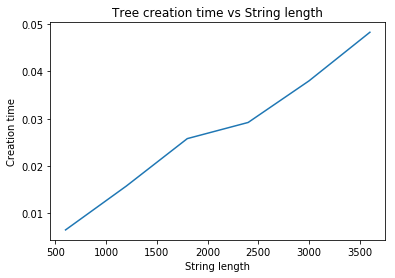

In [16]:
plot_graph_create(output)

In [19]:
def creation_space_graph(data):


    tree = SuffixTree()
    tree.create(data)


    return sys.getsizeof(tree)


In [20]:
def plot_graph_space(data):
    x=[]
    y=[]
    for i in range(100,len(data)-1,100):
        s=data[0:i]+"$"
        siz=sys.getsizeof(s)
        x.append(creation_space_graph(s)*siz)
        
        y.append(i)
    plt.title("Space taken by suffix tree vs String length")
    plt.ylabel("Space in bytes")
    plt.xlabel("String length")
    plt.plot(y,x)
        

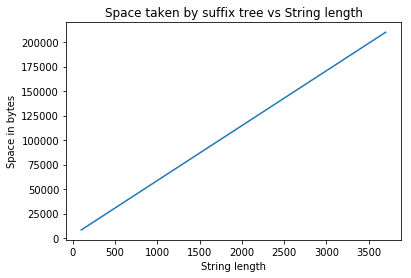

In [21]:
plot_graph_space(output)

51


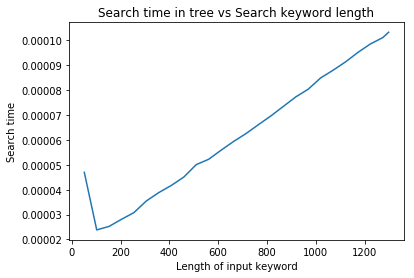

In [22]:
def searchtime(tree,inp):
    search_tree_start_time = time.time()
    out = tree.search(inp)

    search_tree_end_time = time.time()
    diff = search_tree_end_time - search_tree_start_time
    return diff

def plot_graph_create(tree):
    x=[]
    y=[]
    inputval="I had seen little of Holmes lately. My marriage had drifted us away from each other. My own complete happiness, and the home-centred interests which rise up around the man who first finds himself master of his own establishment, were sufficient to absorb all my attention, while Holmes, who loathed every form of society with his whole Bohemian soul, remained in our lodgings in Baker Street, buried among his old books, and alternating from week to week between cocaine and ambition, the drowsiness of the drug, and the fierce energy of his own keen nature. He was still, as ever, deeply attracted by the study of crime, and occupied his immense faculties and extraordinary powers of observation in following out those clues, and clearing up those mysteries which had been abandoned as hopeless by the official police. From time to time I heard some vague account of his doings: of his summons to Odessa in the case of the Trepoff murder, of his clearing up of the singular tragedy of the Atkinson brothers at Trincomalee, and finally of the mission which he had accomplished so delicately and successfully for the reigning family of Holland. Beyond these signs of his activity, however, which I merely shared with all the readers of the daily press, I knew little of my former friend and companion"
    leninput=len(inputval)
    var=leninput//25
    print(var)
    for i in range(0,leninput,var):
        x.append(searchtime(tree,inputval[0:i+var].strip()))
        y.append(len(inputval[0:i+var].strip()))

    plt.title("Search time in tree vs Search keyword length")
    plt.ylabel("Search time")
    plt.xlabel("Length of input keyword")
    plt.plot(y,x)
    

    
tree = SuffixTree()
tree.create(output)
plot_graph_create(tree)